# Basic analysis and plotting of geodata with Python
In this hands-on lesson, we are going to use this notebook as a guide to explore, analyze and plot data from the Airports dataset from Natural Earth. For each step in this process, we are going to write code together to acheive some goals: 

1. Read and explore the Airports dataset
2. Group airports by country and report the top 10 countries with the most airports
3. Input a 2-digit country code and return a list of airports in it
4. Answer the question, "How many countries have only one airport?"
5. Report the proportion of airports in the Southern vs. Northern hemisphere
6. Find the furthest south and north airports by latitude
7. Create a custom "hemisphere" column based on conditional statement
8. Plot all airports and per hemisphere

## Step 1: Read and explore the Airports dataset
Our first step is to import libraries we'll need to read in and explore the airports dataset. Hit shift+Enter to run the cell below and import the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors

Next, let's read in the airports_edit.csv file and store it as a DataFrame called "df". Pandas has a built-in function for reading in csv files called, read_csv(). Fill in the blanks to read in and store the dataset as df.

In [2]:
df = pd.read_csv("airports_edit.csv")

There are several tools to explore the dataset with pandas, like .head(), .shape() and .info() which can all be written either in combination with print statements or on their own, attached to the df DataFrame we just created to give us some quick information about its size, attributes and contents. Run the df.head() cell below, then try writing commands for .shape() and .info(). Hint: with these two, you will need a print statement.

In [3]:
df.head()
print(df.shape)
print(df.info())

(835, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       835 non-null    object 
 1   latitude   835 non-null    float64
 2   longitude  835 non-null    float64
 3   iata_code  835 non-null    object 
 4   country    834 non-null    object 
dtypes: float64(2), object(3)
memory usage: 32.7+ KB
None


## Step 2: Group airports by country and report the top 10 countries with the most airports
The .value_counts() function can be used to count the number of airports per country. The groupby function can be used to group data by country and count the number of unique name values of airports associated with each country. 

Since you can plot data directly from your DataFrame using the plot() method in MatPlotLib, we can store the groupby object. Using the .describe() method, show some statistics about the airports after they are divided by country. For example, what is the mean number of airports per country? What is the most? What is the least?

Start by adding the value_counts() function to the country column from df in the cell below. Run shift+Enter and see what happens. Then move on to try creating a new groupby object that sorts countries by number of airports in the order of most to least.

In [4]:
df['country'].value_counts()
# The US has the most airports, followed by India, Canada and Mexico
# this can also be achieved after saving the groupby object by print(by_country)

US    132
IN     51
CA     45
MX     39
CN     38
     ... 
LR      1
PF      1
HR      1
CR      1
TG      1
Name: country, Length: 188, dtype: int64

In [6]:
groupby_country = df.groupby('country')['name'].nunique().sort_values(ascending = False)
groupby_country.describe()

count    188.000000
mean       4.430851
std       11.610916
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      131.000000
Name: name, dtype: float64

Create a bar plot of airports by country using Matplotlib. Since there are a lot of countries on earth and it makes it hard to read the data, restrict your report to the top 10 by specifing rows 0:9.

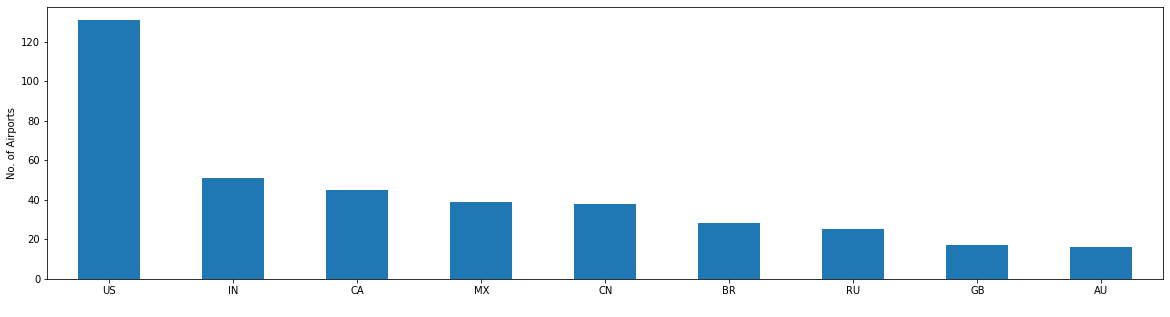

In [7]:
# create bar plot here
fig, ax = plt.subplots(figsize=(20, 5))
groupby_country.iloc[0:9].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("No. of Airports")
plt.xlabel(" ")
plt.show()

## Step 3: Input a 2-digit country code and return a list of airports in it
There are many ways to query a DataFrame. Use the .loc method to find and show just those airports that are in the Netherlands (country code = "NL"). Try it with other countries too - this statement should be easily modifiable to call any country on earth and see the list of airports it has.

In [8]:
df.loc[df["country"] == "NL"]

,name,latitude,longitude,iata_code,country
35,Rotterdam The Hague,51.95,4.43,RTM,NL
777,Schiphol,52.31,4.76,AMS,NL


## Step 4: Answer the question, "How many countries have only one airport?"
Create a new dataframe where airports are grouped by country and use the .loc method to request just the rows where counts is equal to 1. Write a print statement that reports how many countries have only one airport. There is some code to get you started...

In [9]:
ap_per_country = df.groupby(['country']).size().reset_index(name='counts').sort_values(by = 'counts' ,ascending = False)
one_ap = ap_per_country.loc[ap_per_country['counts'] == 1].sort_values(by='country',ascending = True)

print(len(one_ap),"countries have only one airport.")

95 countries have only one airport.


## Step 5: Report the proportion of airports in the Southern vs. Northern hemisphere
We can divide the airports dataset by latitude to see the proportion of airports that are located in the two hemispheres of the world. Southern locations are those with a negative latitude, and northern locations are those with a positive latitude. Then, we can store the number of airports in each sub-dataset using the len() function, and create a quick calculation of percentage to include in a print statement that reports the approximate percentage of airports in each hemisphere, respectively. 

The southern hemisphere dataset is created already, create the northern hemisphere.

In [ ]:
sh_df = df[df['latitude'] < 0]
sh_df.head()

nh_df = df[df['latitude'] > 0]
nh_df.head()

In [ ]:
sh_airports = len(sh_df)
nh_airports = len(nh_df)
total_airports = len(df)

print("Approximately",(int((sh_airports/total_airports)*100)),"percent of the world's airports are located in the Southern hemisphere.")
print("Approximately",(int((nh_airports/total_airports)*100)),"percent of the world's airports are located in the Northern hemisphere.")

## Step 6: Find the furthest south and north airports by latitude

In [10]:
df.sort_values(by='latitude', ascending=True).head()
#See the furthest south airport is Hermes Quijada in Argentina

,name,latitude,longitude,iata_code,country
336,Hermes Quijada Int'l,-53.78,-67.75,RGA,AR
683,Carlos Ibáñez de Campo Int'l,-53.01,-70.84,PUQ,CL
337,Piloto Civil Norberto Fernandez Int'l,-51.61,-69.31,RGL,AR
373,Com. Armando Tola Int'l,-50.28,-72.05,ING,AR
290,Dunedin Int'l,-45.92,170.20,DUD,NZ


In [11]:
df.sort_values(by='latitude', ascending=True).tail()
#See the furthest north airport is Resolute Bay in Canada

,name,latitude,longitude,iata_code,country
225,Severomorsk-3 Murmansk N.E.,69.02,33.29,NULL,RU
239,Kirkenes Hoybuktmoen,69.72,29.89,KKN,NO
176,Deadhorse,70.20,-148.46,SCC,US
607,Wiley Post Will Rogers Mem.,71.29,-156.77,BRW,US
206,Resolute Bay,74.72,-94.97,YRB,CA


## Step 7: Create a custom column "hemisphere" based on a conditional statement
Create a new column called hemisphere in the df DataFrame. If latitude is less than 0 it should assign the label "southern" and if greater than 0 it should assign "northern".

To accomplish this, use numpy’s built-in where() function. This function takes three arguments in sequence: the condition we’re testing for, the value to assign to our new column if that condition is true, and the value to assign if it is false.

Create a barplot showing the number of airports per hemisphere.

In [12]:
df['hemisphere'] = np.where(df['latitude'] < 0, 'southern', 'northern')
df.head()

,name,latitude,longitude,iata_code,country,hemisphere
0,Sahnewal,30.85,75.96,LUH,IN,northern
1,Solapur,17.63,75.93,SSE,IN,northern
2,Birsa Munda,23.32,85.32,IXR,IN,northern
3,Ahwaz,31.34,48.75,AWZ,IR,northern
4,Gwalior,26.29,78.22,GWL,IN,northern


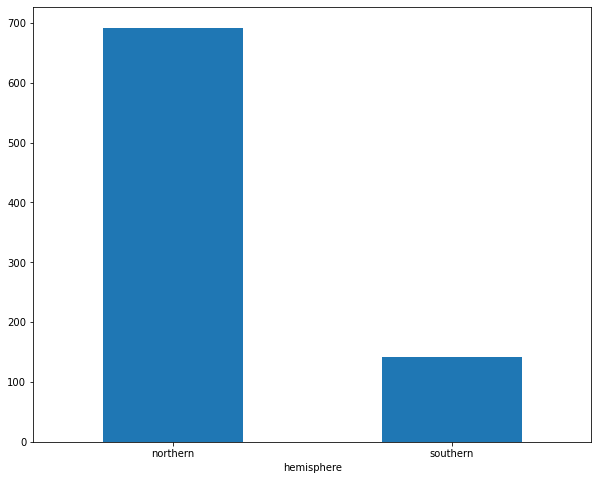

In [14]:
# create barplot here
fig, ax = plt.subplots(figsize=(10, 8))
df.groupby('hemisphere')['name'].nunique().sort_values(ascending = False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## Step 8: Plot all airports and per hemisphere
Using longitude as the x axis and latitude as the y axis, we can plot the airports in their approximate geographic location. Make a scatterplot from the df dataframe and use plt.show() to display it.

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(1,7))
plt.show()

Make a scatterplot from sh_df Dataframe that plots just the airports in the southern hemisphere. Add the ylim() specification to make sure you plot the whole world and it doesn't get distorted. You can also try it with the northern hemisphere.

In [ ]:
sh_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(12,7))
plt.ylim(-60, 80)
plt.show()

Add some color to the world by mapping the color of the points on the scatterplot to their latitude. 

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude",
    c="latitude", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(15,7),
)
plt.legend()
plt.show()

## That's it! Nice job :)
Keep going and learning more with pandas, numpy and matplotlib! 